# PCA (PRINCIPAL COMPONENT ANALYSIS)

### IMPORTING PANDAS

In [840]:
import pandas as pan
import seaborn as sea
import matplotlib.pyplot as map
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import numpy as nu
from sklearn.cluster import KMeans
import warnings
from sklearn.metrics import silhouette_score

## Task 1: Exploratory Data Analysis (EDA):

In [843]:
data=pan.read_csv('wine.csv')
data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [845]:
data.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [847]:
data.shape

(178, 14)

In [849]:
data.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [851]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


### VISUALIZATION 

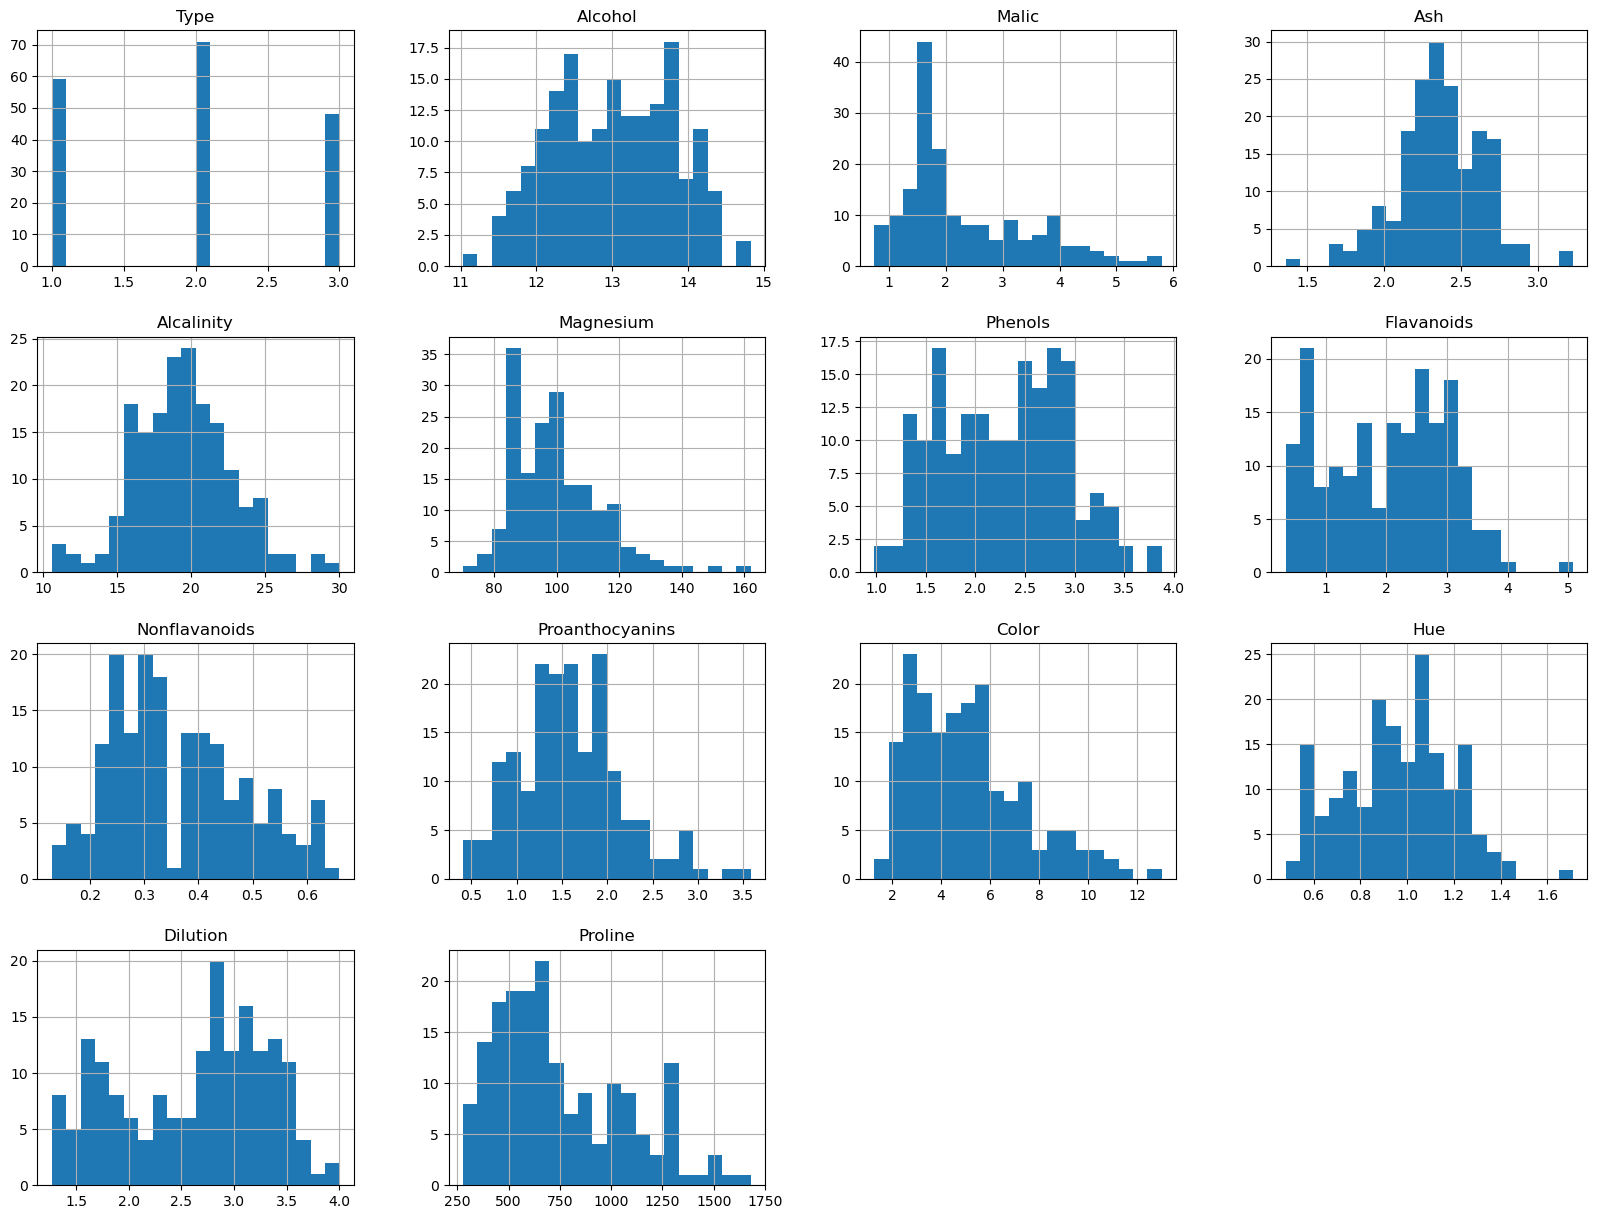

In [854]:
figure=(20,15)
data.hist(bins=20,figsize=figure)
map.show()

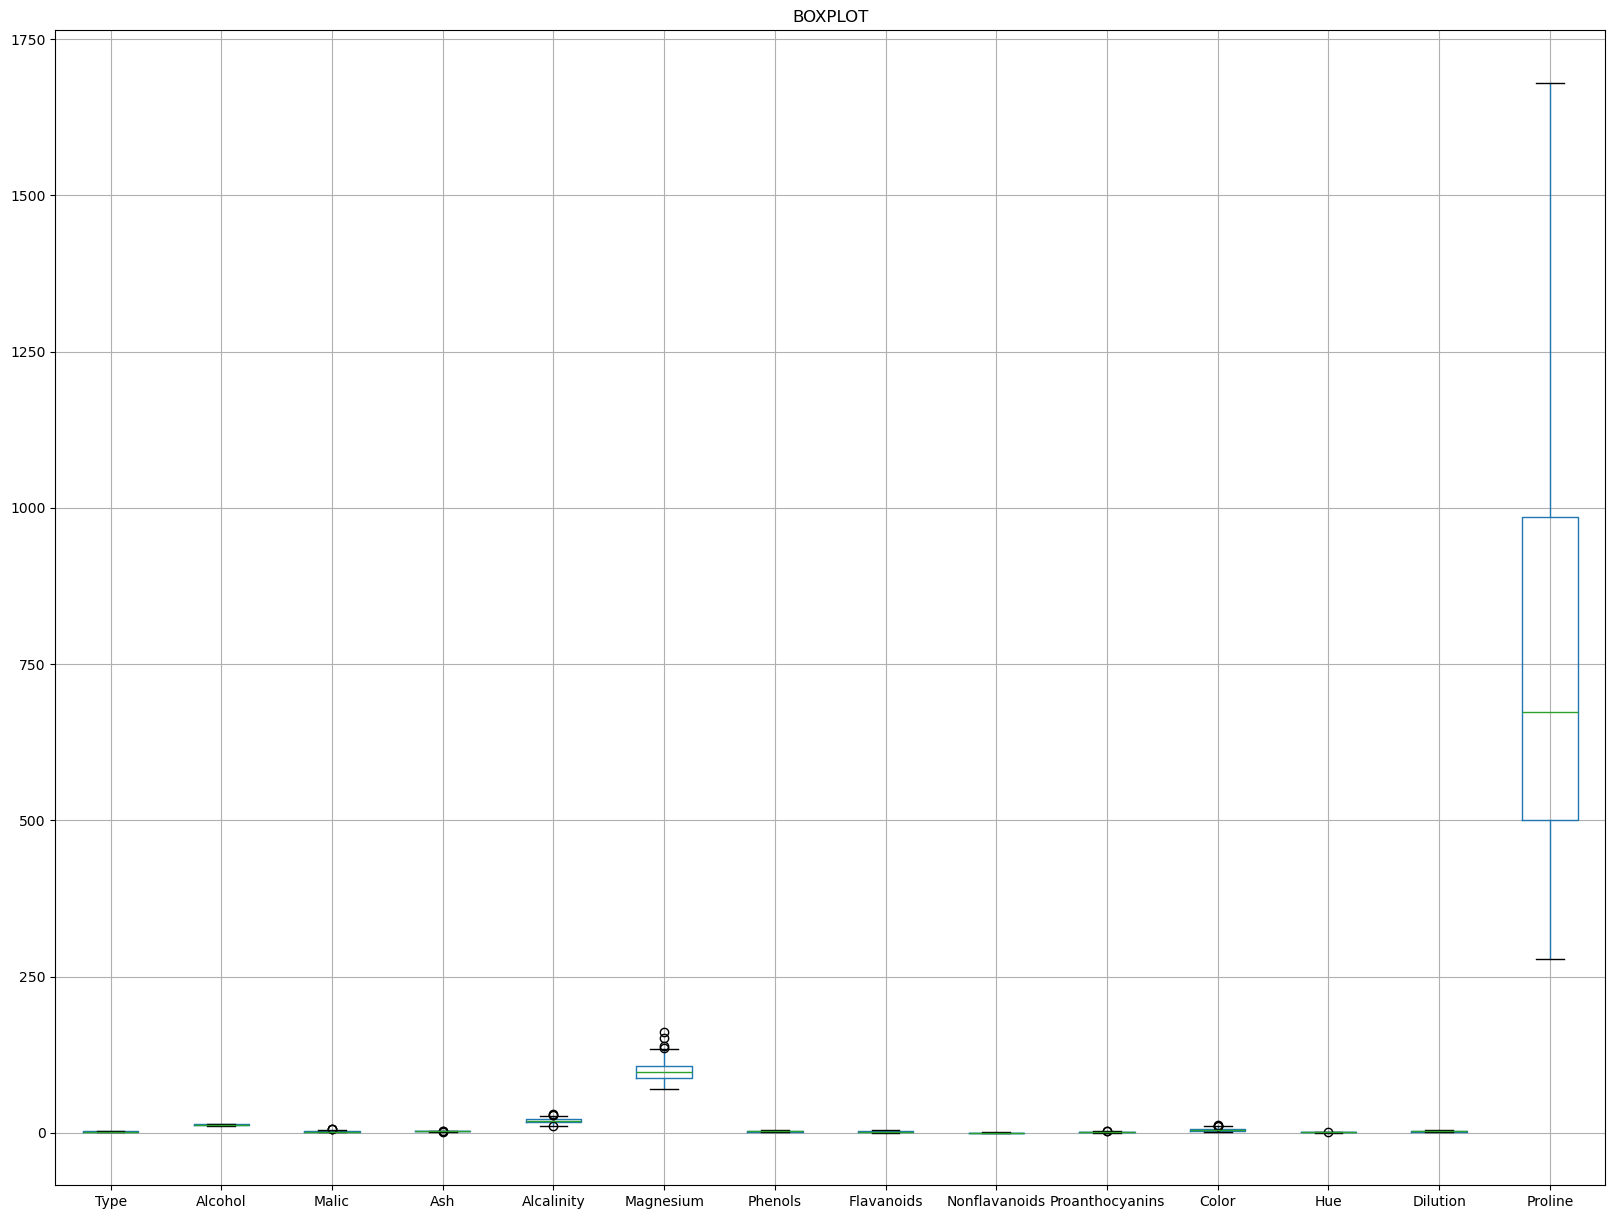

In [855]:
map.figure(figsize=(20,15))
data.boxplot()
map.title('BOXPLOT')
map.show()

In [856]:
data.corr()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


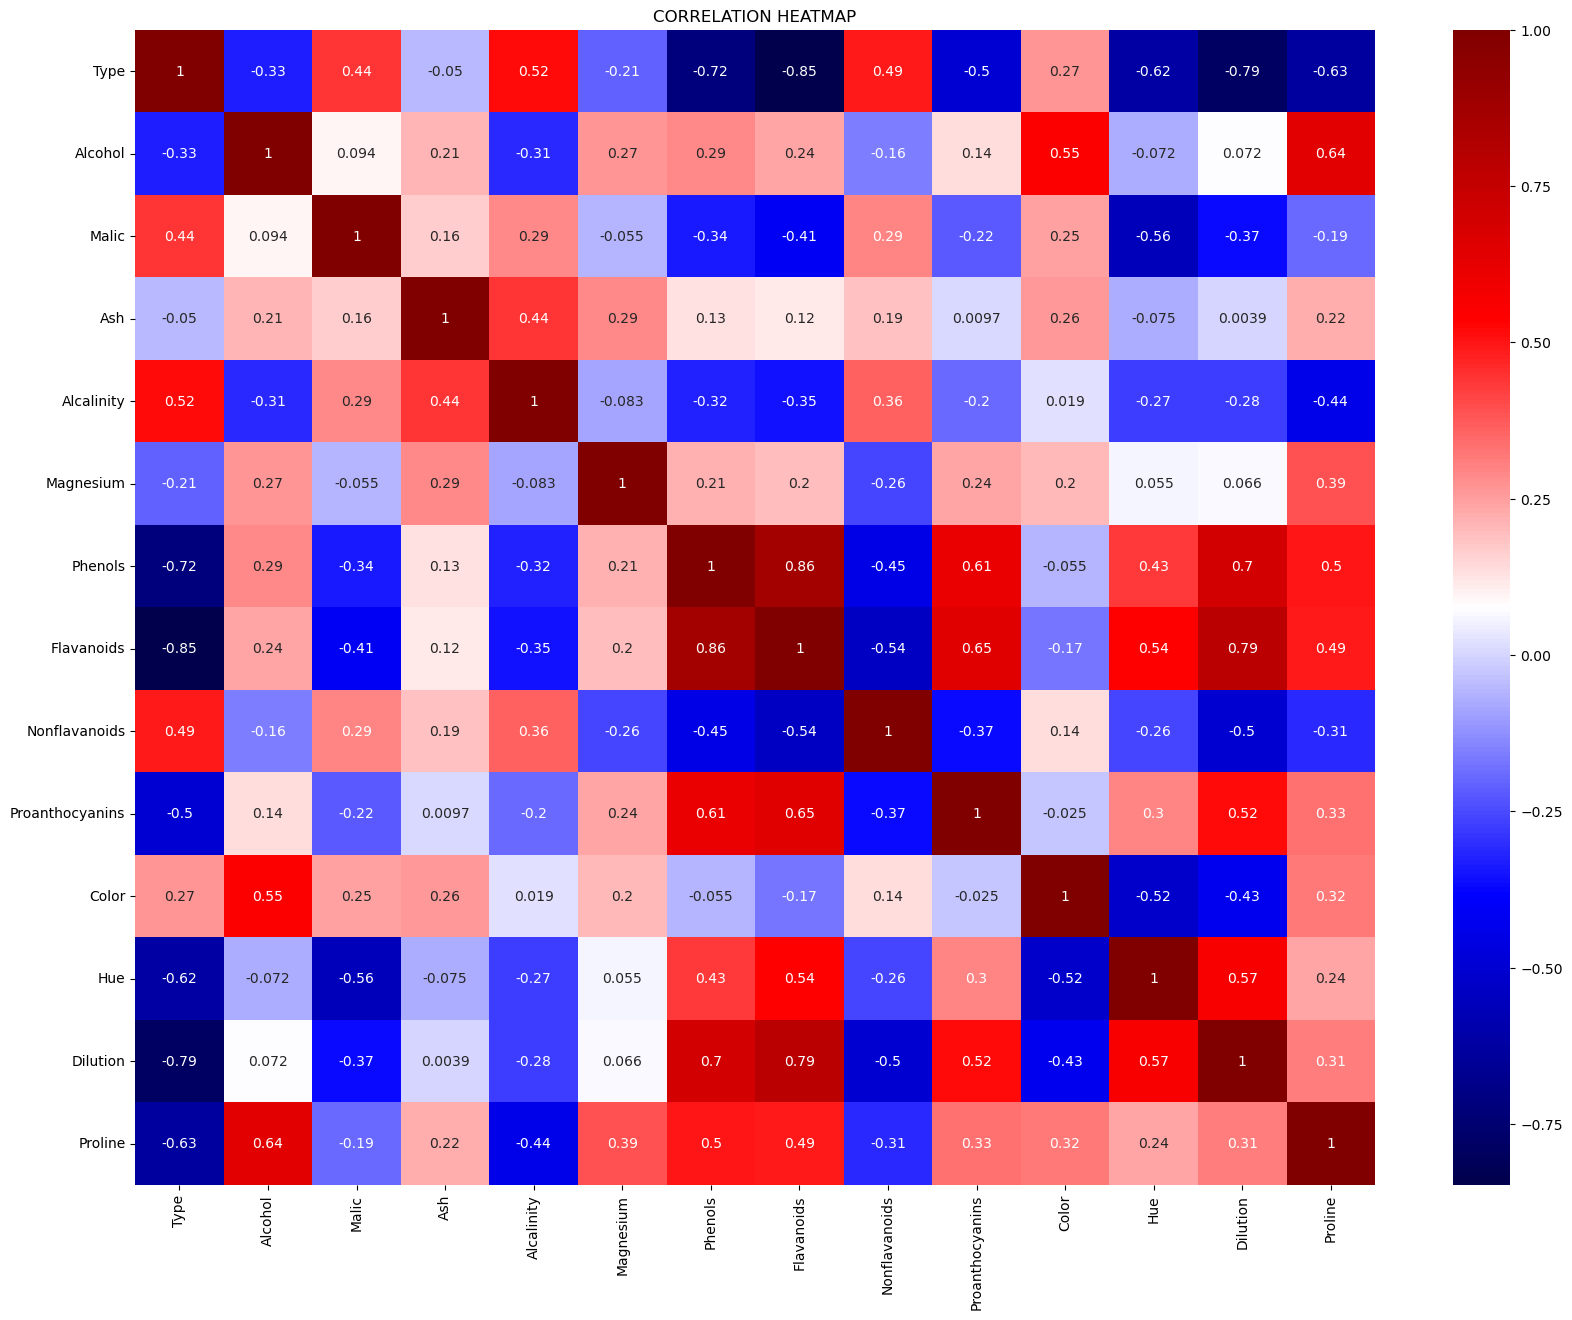

In [857]:
map.figure(figsize=(20,15))
sea.heatmap(data.corr(),annot=True,cmap='seismic')
map.title('CORRELATION HEATMAP')
map.show()

## Task 2: Dimensionality Reduction with PCA:

#### NORMALISING THE DATA

In [860]:
normal_data=scale(data)
normal_data

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

#### APPLYING PCA

In [862]:
pca=PCA()
pca_values=pca.fit_transform(normal_data)

In [863]:
pca_values

array([[-3.52293390e+00, -1.45309844e+00, -1.64795488e-01, ...,
         5.52927766e-01, -3.02978176e-01,  2.00857450e-01],
       [-2.52885806e+00,  3.30019252e-01, -2.02670665e+00, ...,
         3.94971160e-01, -1.46645308e-01,  1.26402355e-01],
       [-2.78502898e+00, -1.03693595e+00,  9.83237703e-01, ...,
         1.89799314e-03,  2.12780166e-02, -5.57515155e-02],
       ...,
       [ 3.02727243e+00, -2.75604024e+00, -9.40803036e-01, ...,
         6.93336340e-01,  1.67035660e-01, -3.16957430e-02],
       [ 2.75522166e+00, -2.29378408e+00, -5.50473677e-01, ...,
         3.44119826e-01, -1.09514873e-01,  1.02823104e-01],
       [ 3.49633565e+00, -2.76060799e+00,  1.01315115e+00, ...,
        -1.89866131e-01, -1.64090011e-01, -2.64916504e-01]])

In [985]:
pca=PCA(n_components=2)
pca_values=pca.fit_transform(normal_data)

In [987]:
pca_values

array([[-3.5229339 , -1.45309844],
       [-2.52885806,  0.33001925],
       [-2.78502898, -1.03693595],
       [-3.92258841, -2.76821026],
       [-1.40751111, -0.86777309],
       [-3.28812981, -2.13017513],
       [-2.75057754, -1.17916999],
       [-2.39286652, -1.61128232],
       [-2.79525633, -0.92317952],
       [-3.00559666, -0.79628417],
       [-3.67868855, -1.31252342],
       [-2.10963477, -0.61298199],
       [-2.43845636, -0.67852331],
       [-3.67349453, -1.14012136],
       [-4.44157575, -2.11031917],
       [-2.60892387, -1.66641801],
       [-2.47542846, -2.33089672],
       [-2.22623243, -1.63359016],
       [-3.74226929, -2.52840527],
       [-2.3944115 , -1.06452946],
       [-3.33656895, -0.79601279],
       [-1.48140399, -0.24008547],
       [-2.82806867,  0.08685755],
       [-2.00771405,  0.51561649],
       [-2.11463604,  0.31592057],
       [-1.39753751, -0.93821529],
       [-2.13348803, -0.68710205],
       [-1.62970383,  0.09118403],
       [-2.50760753,

In [989]:
variance=pca.explained_variance_ratio_
variance

array([0.39542486, 0.17836259])

In [991]:
cumulative_variance=nu.cumsum(nu.round(variance,decimals = 4)*100)
cumulative_variance

array([39.54, 57.38])

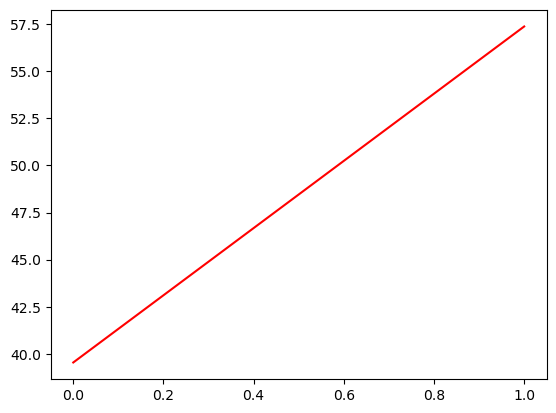

In [992]:
map.plot(cumulative_variance,color='red')
map.show()

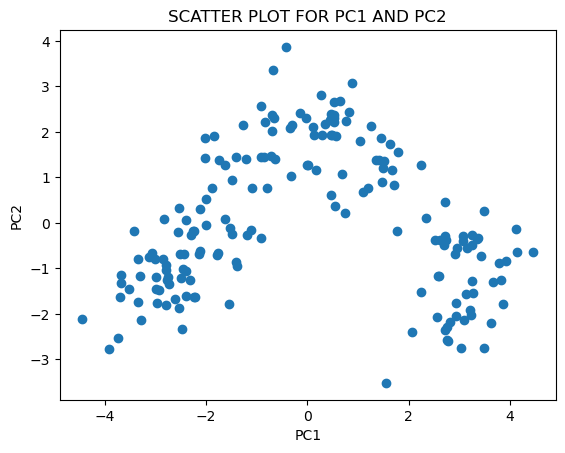

In [993]:
x=pca_values[:,:1]
y=pca_values[:,1:2]
map.scatter(x,y)
map.title('SCATTER PLOT FOR PC1 AND PC2')
map.xlabel('PC1')
map.ylabel('PC2')
map.show()

## Task 3: Clustering with Original Data:

In [996]:
# finding best k-value
warnings.simplefilter('ignore')
wcss=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i).fit(normal_data)
    wcss.append(kmeans.inertia_)
wcss

[2492.0000000000005,
 1728.5219550547677,
 1285.5622587402045,
 1199.0185708918038,
 1124.8053986681166,
 1060.3152549436159,
 1029.2683223537074,
 960.3321066616802,
 915.2135905696946,
 895.7937202021759,
 881.5024188907084,
 818.7583035426626,
 809.7337886097826,
 793.5832188165713]

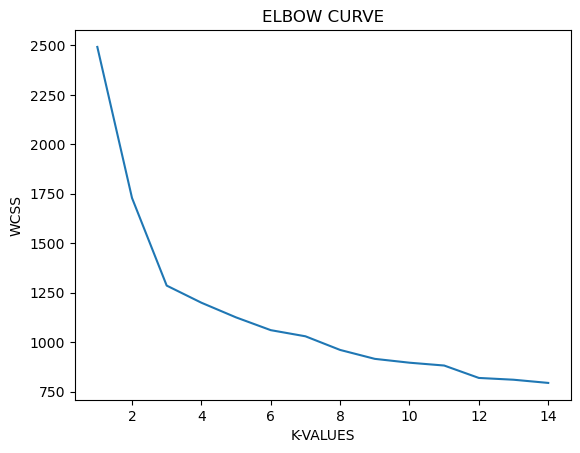

In [997]:
map.plot(range(1,15),wcss)
map.title('ELBOW CURVE')
map.xlabel('K-VALUES')
map.ylabel('WCSS')
map.show()

In [998]:
kmeans=KMeans(n_clusters=3).fit(normal_data)
kmeans

KMeans(n_clusters=3)

In [999]:
kmeans_labels=kmeans.labels_
kmeans_label=pan.Series(kmeans_labels,name='KMEANS LABELS')
kmeans_data=pan.concat([data,kmeans_label],axis=1)
kmeans_data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,KMEANS LABELS
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


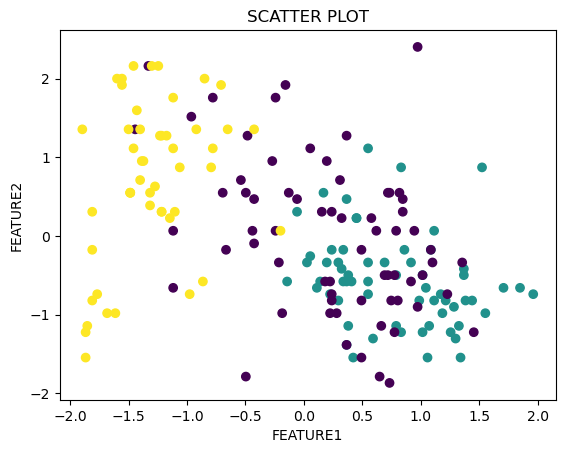

In [1000]:
map.scatter(normal_data[:,12],normal_data[:,8],c=kmeans_labels)
map.title('SCATTER PLOT')
map.xlabel('FEATURE1')
map.ylabel('FEATURE2')
map.show()

In [1001]:
kmeans_silhouette_score=silhouette_score(normal_data,kmeans_labels)
print('KMEANS SILHOETTE SCORE FOR ORIGINAL DATA:',kmeans_silhouette_score)

KMEANS SILHOETTE SCORE FOR ORIGINAL DATA: 0.30648398324833453


## Task 4: Clustering with PCA Data:

In [1003]:
# finding best k-value
warnings.simplefilter('ignore')
wcss1=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i).fit(pca_values)
    wcss1.append(kmeans.inertia_)
wcss1

[1429.878322929329,
 669.2487621749067,
 236.4775051306492,
 182.2347849037829,
 148.18287669342823,
 130.7231422085226,
 91.14097816499128,
 81.58932958637202,
 74.12861101560469,
 66.43107999748636,
 63.62506138969982,
 56.629485880697864,
 51.55891952508959,
 51.541585706387096]

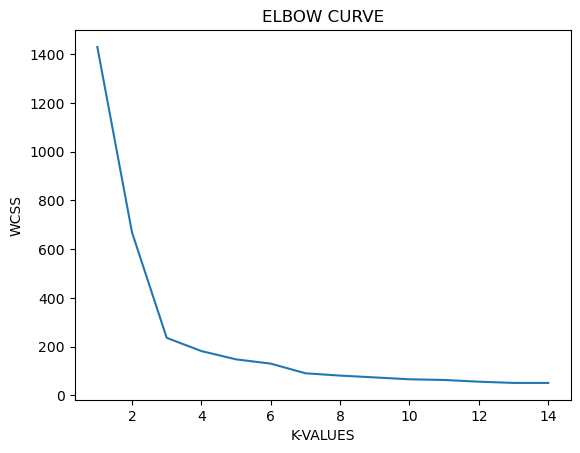

In [1004]:
map.plot(range(1,15),wcss1)
map.title('ELBOW CURVE')
map.xlabel('K-VALUES')
map.ylabel('WCSS')
map.show()

In [1005]:
kmeans1=KMeans(n_clusters=3).fit(pca_values)
kmeans1

KMeans(n_clusters=3)

In [1006]:
kmeans_labels1=kmeans.labels_
kmeans_labels1

array([ 9,  7,  2,  9, 13,  9,  2,  2,  2,  2,  9,  7,  7,  9,  9,  2,  2,
        2,  9,  2,  2, 13,  7,  7,  7, 13,  7, 13,  7,  7,  2,  2,  7,  2,
       13,  7, 13, 13, 12,  2,  2, 13,  2, 13,  7,  2,  2,  2,  2,  2,  7,
        2,  9,  2,  2,  2,  2,  2,  9, 11,  8,  8,  3, 12,  3,  1, 12,  4,
        8, 12,  8, 12,  8,  7, 12, 11,  4,  8,  1,  1,  4,  1, 11,  6,  1,
        4, 11, 11, 11, 11, 11,  8,  8,  4,  4,  7,  8,  4, 12,  4,  4, 11,
        3, 11,  4,  8, 11,  8,  3, 12,  1,  3,  8, 11,  3,  4, 11,  3,  8,
       11,  1, 13,  8,  8,  1,  3,  3,  8,  3,  8,  6,  6,  6,  6,  6,  6,
       10, 10,  6,  6,  6,  6,  6,  6,  5,  6, 10, 10,  0,  0,  0,  0,  5,
        0,  6,  0,  0, 10,  5,  5, 10,  5,  6,  6,  0, 10,  0, 10,  5,  0,
        6, 10,  0,  0,  0,  0,  0,  0])

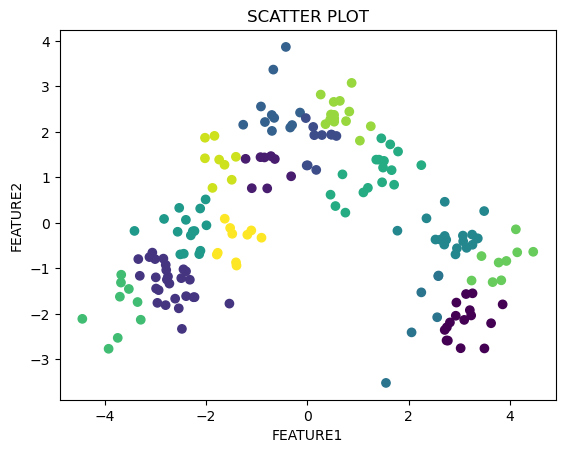

In [1007]:
map.scatter(pca_values[:,0],pca_values[:,1],c=kmeans_labels1)
map.title('SCATTER PLOT')
map.xlabel('FEATURE1')
map.ylabel('FEATURE2')
map.show()

In [1008]:
kmeans_silhouette_score1=silhouette_score(pca_values,kmeans_labels1)
print('KMEANS SILHOETTE SCORE FOR PCA  DATA:',kmeans_silhouette_score1)

KMEANS SILHOETTE SCORE FOR PCA  DATA: 0.36151901042439993


## Task 5: Comparison and Analysis:

##### 	Compare the clustering results obtained from the original dataset and PCA-transformed data.

In [1012]:
comparing_cluster=pan.DataFrame({
    'ORIGINAL DATA':kmeans_silhouette_score,
    'PCA  DATA':kmeans_silhouette_score1
},index=(0,1))
comparing_cluster

,ORIGINAL DATA,PCA DATA
0,0.306484,0.361519
1,0.306484,0.361519


##### Discuss any similarities or differences observed in the clustering results.##### .	Reflect on the impact of dimensionality reduction on clustering performance.


By reducing the dimensionality of the data , the silhouette score is improves that means performance is well

## Task 6: Conclusion and Insights

1)When comparing clustering results from the original data with those from the PCA-transformed data, we can see some differences in how well the          clusters are formed.


2)This can be measured by looking at metrics like the silhouette score and Davies-Bouldin index. A higher silhouette score on the PCA data would          suggest that clusters are more clearly separated.



3)A lower Davies-Bouldin index indicates clusters that are tighter and further apart, which is also good. If the PCA data scores better in these          metrics, it means reducing the dimensions helped. However, if the original data scores better, it could mean some important information was lost in     the dimensionality reduction.


4)Dimensionality reduction, like PCA, affects clustering by making the process faster and easier, especially with high-dimensional data.



5)This can be beneficial if the dataset has many features because it cuts down processing time and complexity. But the downside is that PCA discards      some of the finer details, focusing on the most prominent trends.This may mean that smaller, potentially important differences between data points      could be lost, leading to less specific clusters.